fashion mnist keras tf example

In [1]:
import tensorflow as tf

2022-12-14 21:01:20.774624: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
#tf.config.list_physical_devices("GPU")

2.3.0


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ["T-shirt/top", "Trousers", "Pullover", "Dress", "Coat",
               "Sandals", "Shirt", "Sneakers", "Bag", "Ankle boot"]

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
type(train_images)

numpy.ndarray

In [8]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [9]:
train_images_normal = train_images / 255.0

In [10]:
train_images_normal[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
train_labels[0]

9

In [12]:
train_labels[1]

0

In [13]:
train_labels.max()

9

In [14]:
train_labels.min()

0

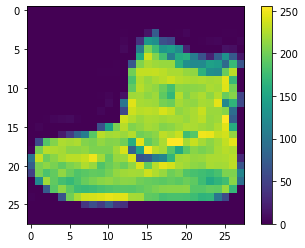

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

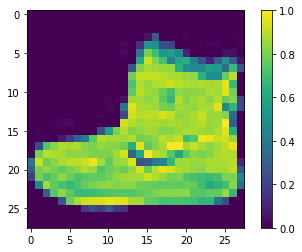

In [16]:
plt.figure()
plt.imshow(train_images_normal[0])
plt.colorbar()
plt.show()

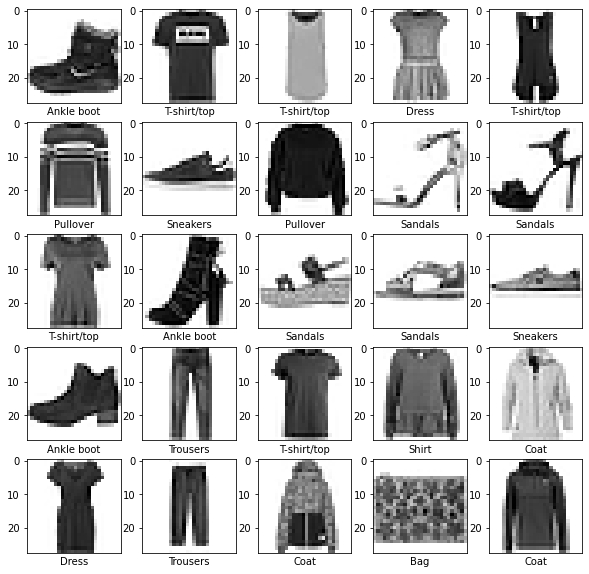

In [17]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    #plt.yticks([])
    plt.imshow(train_images_normal[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1)])

model.compile(optimizer="adam",
             loss=tf.keras.losses.MeanAbsoluteError(),
             metrics=["accuracy"])

2022-12-14 21:01:28.094794: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-12-14 21:01:29.940045: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:968] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-14 21:01:29.951196: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 Laptop GPU computeCapability: 8.6
coreClock: 1.425GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2022-12-14 21:01:29.951273: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-12-14 21:01:30.000957: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2022-12-14 21:01:30.024916: I tensorflow/str

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 8.1791 - accuracy: 0.1002
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4335 - accuracy: 0.1170
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1122 - accuracy: 0.1349
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0437 - accuracy: 0.1417
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0108 - accuracy: 0.1432


In [21]:
model.fit(train_images_normal, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6480 - accuracy: 0.1019
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9397 - accuracy: 0.1302
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8546 - accuracy: 0.1391
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7991 - accuracy: 0.1482
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7676 - accuracy: 0.1524


In [22]:

"""model.fit(train_images_normal, train_labels, epochs=50)"""

'model.fit(train_images_normal, train_labels, epochs=50)'

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam",
             loss=tf.keras.losses.MeanAbsoluteError(),
             metrics=["accuracy"])

In [24]:
model.fit(train_images_normal, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 4.4200 - accuracy: 0.1277
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 4.4200 - accuracy: 0.1275
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 4.4200 - accuracy: 0.1275
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 4.4200 - accuracy: 0.1263
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 4.4200 - accuracy: 0.1248


In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam",
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])

In [26]:
model.fit(train_images_normal, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7303 - accuracy: 0.7382
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6846 - accuracy: 0.7777
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6772 - accuracy: 0.7842
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6737 - accuracy: 0.7874
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6687 - accuracy: 0.7916


In [27]:
test_loss_test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 1.6769 - accuracy: 0.7842


In [28]:
test_images_normal = test_images / 255

In [29]:
test_loss_test_acc = model.evaluate(test_images_normal, test_labels, verbose=2)

313/313 - 1s - loss: 1.6681 - accuracy: 0.7925


In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [31]:
#model.save("clothmodel2")

In [48]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.02),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(10)
])
model2.compile(optimizer="adam",
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])

In [49]:
model2.fit(train_images_normal, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5397 - accuracy: 0.8039
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4039 - accuracy: 0.8555
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3680 - accuracy: 0.8686
Epoch 4/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3440 - accuracy: 0.8763
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3251 - accuracy: 0.8838
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3117 - accuracy: 0.8885
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3012 - accuracy: 0.8900
Epoch 8/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2878 - accuracy: 0.8954
Epoch 9/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2819 - accuracy: 0.8964
Epoch 10/15
1875/1875 [==============================] - 11s 6ms/step - los